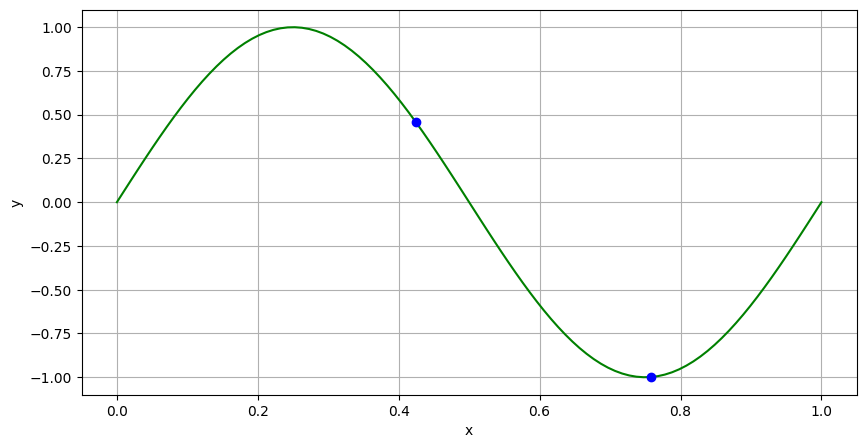

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

sample = 100

x = np.linspace(0, 1, sample)
y = np.sin(2 * np.pi * x)

X = x.reshape(-1, 1)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, train_size=0.02, random_state=9)

model_main = LinearRegression()
model_main.fit(X,y)
y_main_pred = model_main.predict(X)

plt.figure(figsize=(10,5))
plt.plot(x, y, '-g')
plt.plot(X_test, y_test, 'bo')
# plt.plot(X, y_main_pred, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

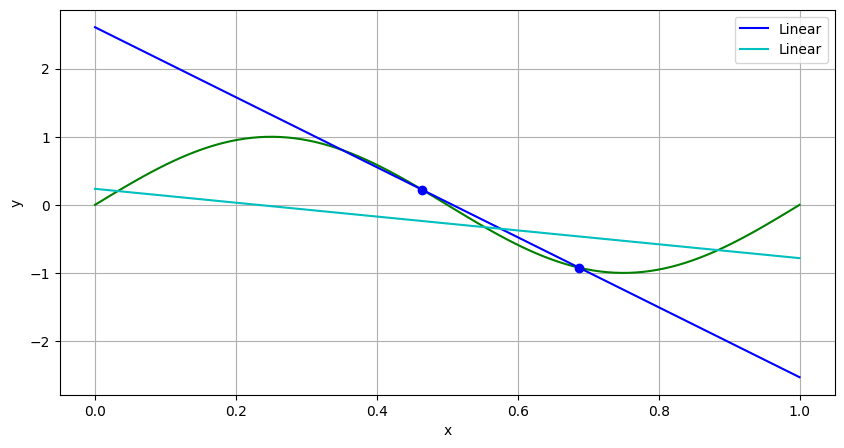

In [97]:


model1 = LinearRegression()
model2 = Ridge(0.1)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# y_pr1 = model1.predict(X_train)
# y_pr2 = model2.predict(X_train)

m1 = model1.coef_
b1 = model1.intercept_

m2 = model2.coef_
b2 = model2.intercept_

x_extended = np.linspace(0, 1, 100).reshape(-1, 1)

y_extended1 =  m1 * x_extended + b1
y_extended2 =  m2 * x_extended + b2


plt.figure(figsize=(10,5))
plt.plot(x, y, '-g')
plt.plot(X_train, y_train, 'bo')
plt.plot(x_extended, y_extended1, 'b', label="Linear")
plt.plot(x_extended, y_extended2, 'c', label="Linear")
# plt.plot(X, y_main_pred, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)


In [98]:
def Normal(random, X_data, y_data):

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.02, train_size=0.02, random_state=random)

    model1 = LinearRegression()
    model1.fit(X_train, y_train)

    m = model1.coef_
    b = model1.intercept_

    x_extended = np.linspace(0, 1, 100).reshape(-1, 1)
    y_extended =  m * x_extended + b

    return x_extended, y_extended


def Ridge_fu(random, X_data, y_data, j):

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.02, train_size=0.02, random_state=random)

    model1 = Ridge(j)
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    
    m = model1.coef_
    b = model1.intercept_
    

    x_extended = np.linspace(0, 1, 100).reshape(-1, 1)
    y_extended =  m * x_extended + b

    return x_extended, y_extended

Variance : 2.238768357040533
Bias : 0.4953099643307785


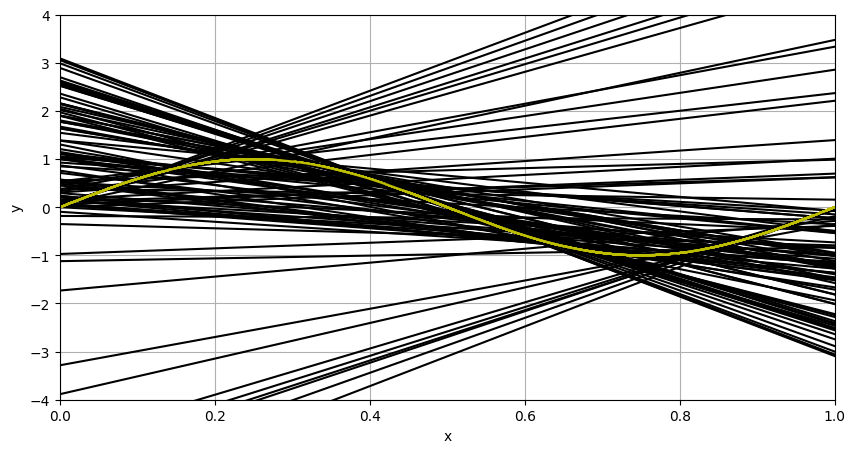

In [99]:
plt.figure(figsize=(10,5))

X_data1 = []
y_data1 = []
for i in range(100):
    X_plot1, y_plot1 = Normal(i, X, y)
    X_data1.append(X_plot1)
    y_data1.append(y_plot1)

    plt.plot(X_plot1, y_plot1, '-k')
    plt.plot(x, y, '-y')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.xlim(0,1)  
    plt.ylim(-4,4)

y_mean1 = np.mean(y_data1)
variance1 = np.subtract(y_data1, y_mean1)
variance1 = variance1 ** 2
variance1 = np.mean(variance1)

bias1 = np.subtract(y, y_mean1)
bias1 = np.mean(bias1 ** 2)
print("Variance :",variance1)
print("Bias :",bias1)


Variance : 0.3097870636834809
Bias : 0.4950264606321872


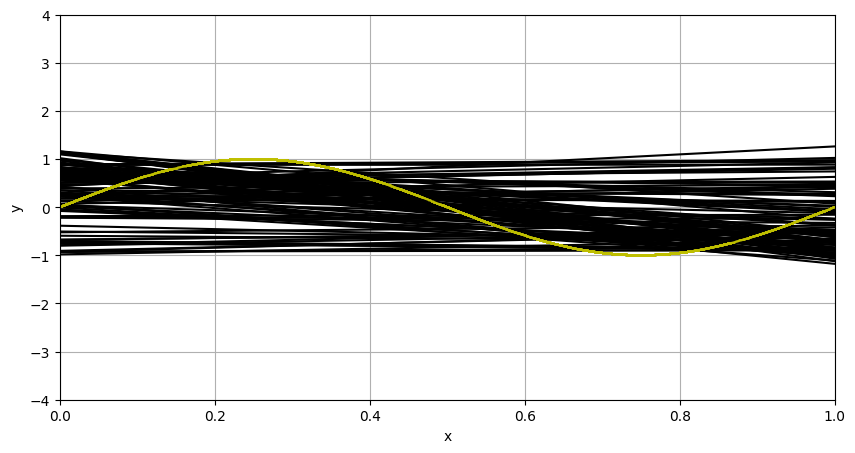

In [100]:
plt.figure(figsize=(10,5))

lambd = 0.1
X_data2 = []
y_data2 = []
for i in range(100):
    X_plot2, y_plot2 = Ridge_fu(i, X, y, lambd)
    X_data2.append(X_plot2)
    y_data2.append(y_plot2)

    plt.plot(X_plot2, y_plot2, '-k')
    plt.plot(x, y, '-y')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.xlim(0,1)  
    plt.ylim(-4,4)

y_mean2 = np.mean(y_data2)
variance2 = np.subtract(y_data2, y_mean2)
variance2 = variance2 ** 2
variance2 = np.mean(variance2)
bias2 = np.subtract(y, y_mean2)
bias2 = np.mean(bias2 ** 2)

print("Variance :",variance2)
print("Bias :",bias2)